# Exercise 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp

%matplotlib inline

In [138]:
N = 20
J = 1
kT = 0.1

In [32]:
def flip(x):
    xf = x.copy()
    f = random.randint(0,N-1)
    xf[f] = -xf[f]
    return xf

def energy(x):
    en = 0
    for i in range(N-1):
        en += x[i]*x[i+1]
    E = -J*en
    return E

def prob(dE):
    return np.exp(-dE/kT)

In [79]:
def plotConfigurations(configurations):
    '''
    Can be used to plot your generated configurations in an animation.
    @param configurations: List of configurations, where each configuration
                           is a list/array of the 1D spin alignments.
    '''

    fig = plt.figure("Simulation 1D", figsize=(7,5))
    ax = fig.add_subplot(111)
    ax.imshow(configurations, interpolation='none', aspect='auto', origin='lower')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"Time")
    ax.set_ylim(bottom=0)
    fig.suptitle("Simulation")
    plt.show()

[-1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1]
[-1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1]


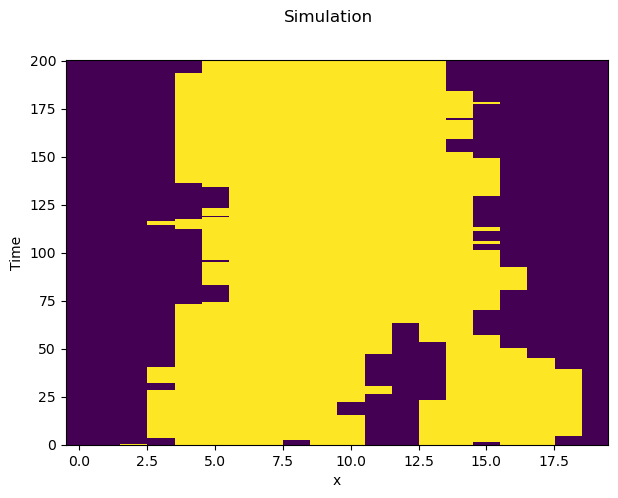

In [140]:
def main():

    x = np.array([random.randint(0,1) for i in range(N)])
    x[x==0] = -1
    print(x)
    
    configs = np.array([x])
    
    for i in range(10*N):

        x_tr = flip(x)

        E_k = energy(x)
        E_tr = energy(x_tr)
        dE = E_tr - E_k

        P = prob(dE)
        
        if E_tr <= E_k:
            x = x_tr
        else:
            if P >= random.random():
                x = x_tr
            else:
                x = x
                
        configs = np.concatenate((configs,np.array([x])))
             
    print(x)
    
    plotConfigurations(configs)
    
main()

In [19]:
def f1(x):
    return x**2 + x - 1

def f1_anal():
    return sp.integrate.quad(f1,-10,10)[0]

def f2(x):
    return (np.cos(x)*np.log(x))/np.sqrt(x)

def f2_anal():
    return sp.integrate.quad(f2,0,1)[0]

def MC(f,a,b,N=10000):
    vals = np.random.uniform(a,b,N)
    y = [f(v) for v in vals]
    return (b-a)*sum(y)/N

In [20]:
print(f"MC: {MC(f1,-10,10)}")
print(f"An: {f1_anal()}")

MC: 641.2000912768174
An: 646.6666666666667


In [21]:
print(f"MC: {MC(f2,0,1)}")
print(f"An: {f2_anal()}")

MC: -3.998504803561449
An: -3.922025080846606


In [28]:
def make_histogram(func,a,b,n=1000):
    MC_hist = np.zeros(n)
    for i in range(n):
        val = MC(func,a,b)
        MC_hist[i] = val
    return MC_hist

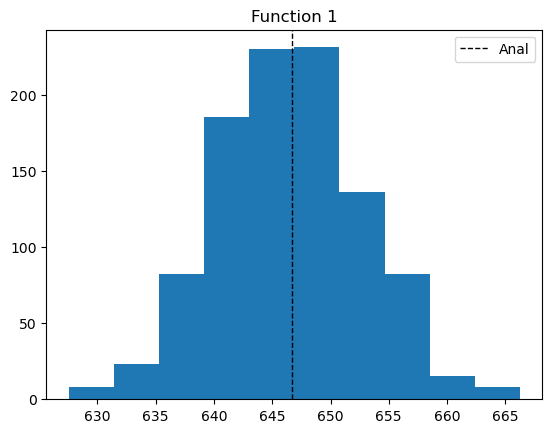

In [29]:
f1_hist = make_histogram(f1,-10,10)

plt.figure()
plt.title("Function 1")
plt.hist(f1_hist)
plt.axvline(f1_anal(), color='k', linestyle='dashed', linewidth=1,label="Anal")
plt.legend()
plt.show()

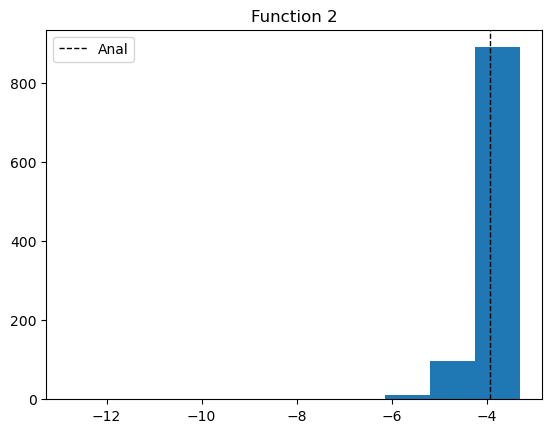

In [30]:
f2_hist = make_histogram(f2,0,1)

plt.figure()
plt.title("Function 2")
plt.hist(f2_hist)
plt.axvline(f2_anal(), color='k', linestyle='dashed', linewidth=1,label="Anal")
plt.legend()
plt.show()